# CIA Country Analysis and Clustering
#### Submitted by Maria Eloisa H. Garcia

---

Source: All these data sets are made up of data from the US government. 
https://www.cia.gov/library/publications/the-world-factbook/docs/faqs.html

## Goal: 

### Gain insights into similarity between countries and regions of the world by experimenting with K-Means Clustering
----

In [111]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.cluster import KMeans
from kneed import KneeLocator,KneeLocator
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [112]:
# Load the dataset
df = pd.read_csv("cia_factbook.csv", sep=',', header=0)
df

,country,area,birth_rate,death_rate,infant_mortality_rate,internet_users,life_exp_at_birth,maternal_mortality_rate,net_migration_rate,population,population_growth_rate
0,Russia,17098242.0,11.87,13.83,7.08,40853000.0,70.16,34.0,1.69,1.424703e+08,-0.03
1,Canada,9984670.0,10.29,8.31,4.71,26960000.0,81.67,12.0,5.66,3.483484e+07,0.76
2,United States,9826675.0,13.42,8.15,6.17,245000000.0,79.56,21.0,2.45,3.188921e+08,0.77
3,China,9596960.0,12.17,7.44,14.79,389000000.0,75.15,37.0,-0.32,1.355693e+09,0.44
4,Brazil,8514877.0,14.72,6.54,19.21,75982000.0,73.28,56.0,-0.15,2.026568e+08,0.80
...,...,...,...,...,...,...,...,...,...,...,...
254,Bouvet Island,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255,Palmyra Atoll,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256,Akrotiri,123.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
257,European Union,NaN,NaN,NaN,4.33,NaN,80.02,NaN,NaN,5.114348e+08,NaN


## 1. Perform Exploratory Data Analysis

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  259 non-null    object 
 1   area                     257 non-null    float64
 2   birth_rate               224 non-null    float64
 3   death_rate               225 non-null    float64
 4   infant_mortality_rate    224 non-null    float64
 5   internet_users           213 non-null    float64
 6   life_exp_at_birth        224 non-null    float64
 7   maternal_mortality_rate  184 non-null    float64
 8   net_migration_rate       222 non-null    float64
 9   population               238 non-null    float64
 10  population_growth_rate   233 non-null    float64
dtypes: float64(10), object(1)
memory usage: 22.4+ KB


In [114]:
df.isna().sum()

country                     0
area                        2
birth_rate                 35
death_rate                 34
infant_mortality_rate      35
internet_users             46
life_exp_at_birth          35
maternal_mortality_rate    75
net_migration_rate         37
population                 21
population_growth_rate     26
dtype: int64

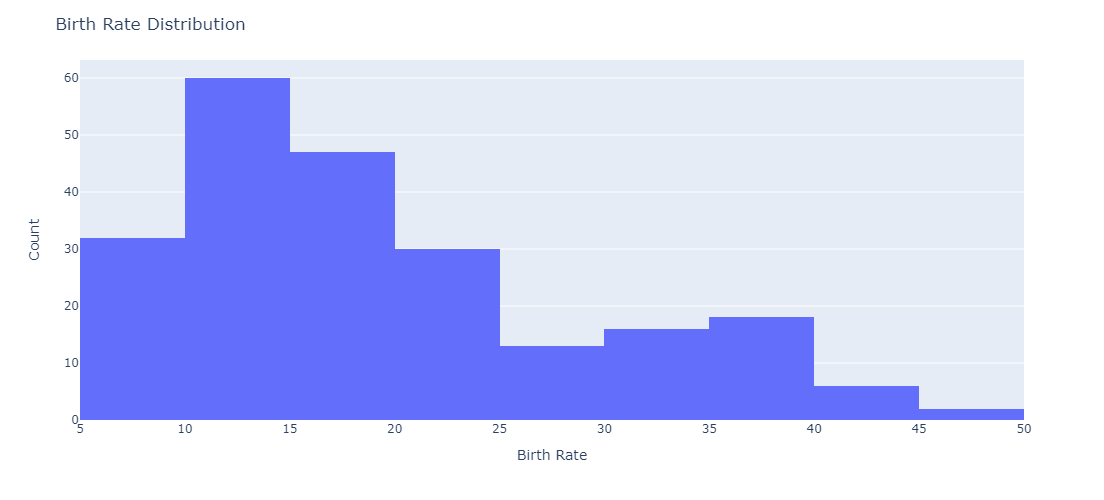

In [115]:
fig = px.histogram(df, x='birth_rate')
fig.update_layout(title = "Birth Rate Distribution", height = 500)
fig.update_layout(xaxis_title = "Birth Rate", yaxis_title = "Count")
fig.show()

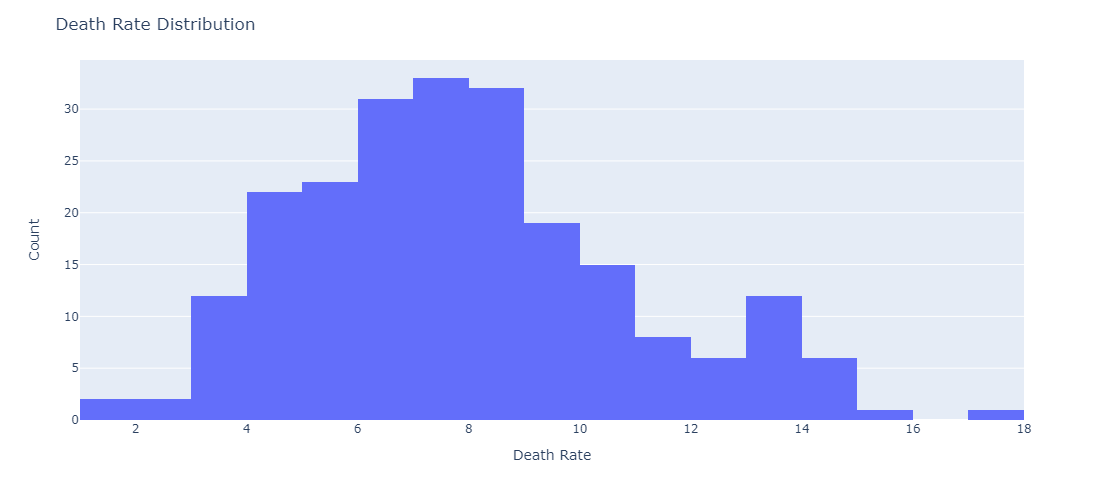

In [116]:
fig = px.histogram(df, x='death_rate')
fig.update_layout(title = "Death Rate Distribution", height = 500)
fig.update_layout(xaxis_title = "Death Rate", yaxis_title = "Count")
fig.show()

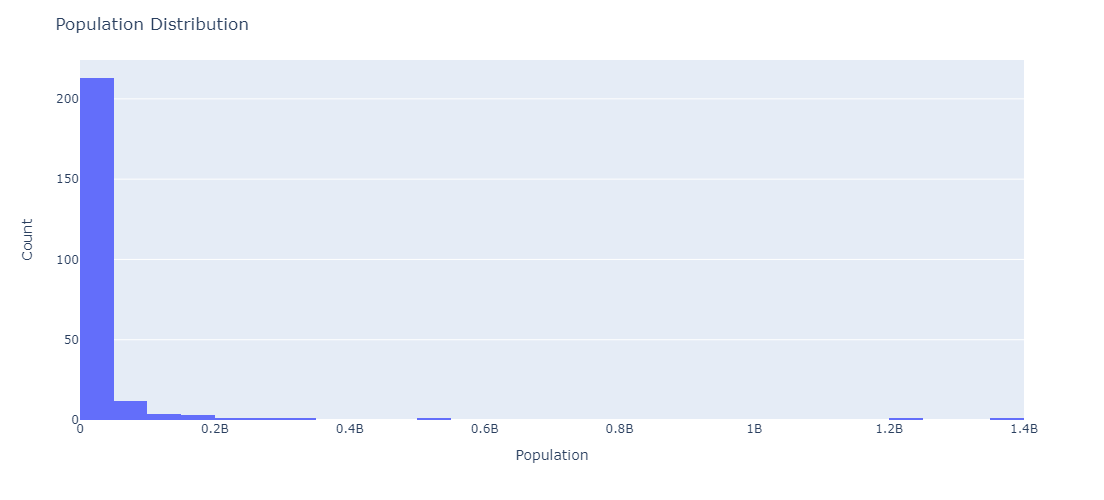

In [117]:
fig = px.histogram(df, x='population')
fig.update_layout(title = "Population Distribution", height = 500)
fig.update_layout(xaxis_title = "Population", yaxis_title = "Count")
fig.show()

-----

## 2. Feature Engineering for Missing Data

In [118]:
df.isna().sum()

country                     0
area                        2
birth_rate                 35
death_rate                 34
infant_mortality_rate      35
internet_users             46
life_exp_at_birth          35
maternal_mortality_rate    75
net_migration_rate         37
population                 21
population_growth_rate     26
dtype: int64

**TASK: What countries have NaN for Agriculture? What is the main aspect of these countries?**

**TASK: Notice climate is missing for a few countries, but not the Region! Let's use this to our advantage. Fill in the missing Climate values based on the mean climate value for its region.**

Hints on how to do this: https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group

**TASK: Use the same method for the missing values in Literacy.**

= Agriculture, Climate and Region are not features of the dataset. The following is performed instead:

In [119]:
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df.select_dtypes(include=[np.number])), columns=df.select_dtypes(include=[np.number]).columns)

df['population_density'] = df['population'] / df['area']
df['natural_increase_rate'] = df['birth_rate'] - df['death_rate']

df['population_log'] = np.log(df['population'] + 1)

df.dropna(inplace=True)

In [120]:
df.isna().sum()

area                       0
birth_rate                 0
death_rate                 0
infant_mortality_rate      0
internet_users             0
life_exp_at_birth          0
maternal_mortality_rate    0
net_migration_rate         0
population                 0
population_growth_rate     0
population_density         0
natural_increase_rate      0
population_log             0
dtype: int64

In [121]:
df.head()

,area,birth_rate,death_rate,infant_mortality_rate,internet_users,life_exp_at_birth,maternal_mortality_rate,net_migration_rate,population,population_growth_rate,population_density,natural_increase_rate,population_log
0,17098242.0,11.87,13.83,7.08,40853000.0,70.16,34.0,1.69,1.424703e+08,-0.03,8.332451,-1.96,18.774644
1,9984670.0,10.29,8.31,4.71,26960000.0,81.67,12.0,5.66,3.483484e+07,0.76,3.488832,1.98,17.366129
2,9826675.0,13.42,8.15,6.17,245000000.0,79.56,21.0,2.45,3.188921e+08,0.77,32.451679,5.27,19.580363
3,9596960.0,12.17,7.44,14.79,389000000.0,75.15,37.0,-0.32,1.355693e+09,0.44,141.262710,4.73,21.027578
4,8514877.0,14.72,6.54,19.21,75982000.0,73.28,56.0,-0.15,2.026568e+08,0.80,23.800319,8.18,19.127024


# 3. Data Feature Preparation

**TASK: Create a dummy variable to all categorical data.**

In [122]:
df.head()

,area,birth_rate,death_rate,infant_mortality_rate,internet_users,life_exp_at_birth,maternal_mortality_rate,net_migration_rate,population,population_growth_rate,population_density,natural_increase_rate,population_log
0,17098242.0,11.87,13.83,7.08,40853000.0,70.16,34.0,1.69,1.424703e+08,-0.03,8.332451,-1.96,18.774644
1,9984670.0,10.29,8.31,4.71,26960000.0,81.67,12.0,5.66,3.483484e+07,0.76,3.488832,1.98,17.366129
2,9826675.0,13.42,8.15,6.17,245000000.0,79.56,21.0,2.45,3.188921e+08,0.77,32.451679,5.27,19.580363
3,9596960.0,12.17,7.44,14.79,389000000.0,75.15,37.0,-0.32,1.355693e+09,0.44,141.262710,4.73,21.027578
4,8514877.0,14.72,6.54,19.21,75982000.0,73.28,56.0,-0.15,2.026568e+08,0.80,23.800319,8.18,19.127024


In [123]:
X = pd.get_dummies(df)
X

,area,birth_rate,death_rate,infant_mortality_rate,internet_users,life_exp_at_birth,maternal_mortality_rate,net_migration_rate,population,population_growth_rate,population_density,natural_increase_rate,population_log
0,1.709824e+07,11.870000,13.830000,7.08000,4.085300e+07,70.160000,34.000000,1.690000,1.424703e+08,-0.030000,8.332451e+00,-1.960000,18.774644
1,9.984670e+06,10.290000,8.310000,4.71000,2.696000e+07,81.670000,12.000000,5.660000,3.483484e+07,0.760000,3.488832e+00,1.980000,17.366129
2,9.826675e+06,13.420000,8.150000,6.17000,2.450000e+08,79.560000,21.000000,2.450000,3.188921e+08,0.770000,3.245168e+01,5.270000,19.580363
3,9.596960e+06,12.170000,7.440000,14.79000,3.890000e+08,75.150000,37.000000,-0.320000,1.355693e+09,0.440000,1.412627e+02,4.730000,21.027578
4,8.514877e+06,14.720000,6.540000,19.21000,7.598200e+07,73.280000,56.000000,-0.150000,2.026568e+08,0.800000,2.380032e+01,8.180000,19.127024
...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,4.900000e+01,19.659063,7.906978,24.48442,8.311771e+06,71.826875,177.972826,-0.181577,3.229436e+07,1.100858,6.590686e+05,11.752085,17.290403
255,1.200000e+01,19.659063,7.906978,24.48442,8.311771e+06,71.826875,177.972826,-0.181577,3.229436e+07,1.100858,2.691197e+06,11.752085,17.290403
256,1.230000e+02,19.659063,7.906978,24.48442,8.311771e+06,71.826875,177.972826,-0.181577,3.229436e+07,1.100858,2.625558e+05,11.752085,17.290403
257,5.308881e+05,19.659063,7.906978,4.33000,8.311771e+06,80.020000,177.972826,-0.181577,5.114348e+08,1.100858,9.633570e+02,11.752085,20.052731


**TASK: For numerical data perform standard scaler.**

In [124]:
remove= np.isinf(X.values) | (X.values > 1e6)

X[remove] = np.nan

imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X_imputed)

# 4. Creating and Fitting Kmeans Model

**TASK:** 

- Plot the within sum of squares vs. the number of cluster and find the optimal number of clusters.

In [125]:
model = KMeans(n_clusters=2)

cluster_labels = model.fit_predict(scaled_X)
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [126]:
ssd = []

for k in range(2,30):    
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append([k,model.inertia_])

In [127]:
ssd = pd.DataFrame(ssd, columns = ["Cluster","SSW"])

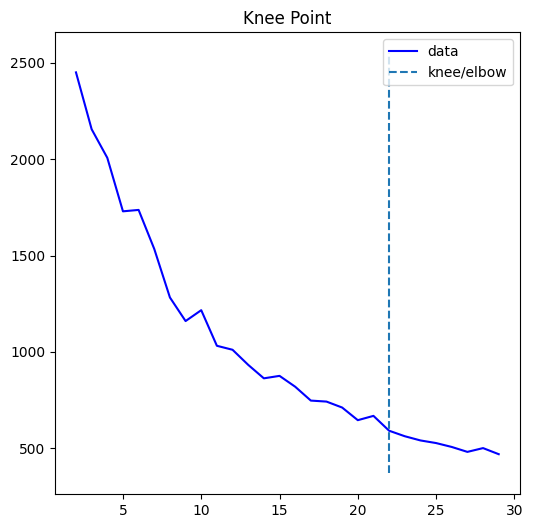

In [128]:
# Locate Knee
kl = KneeLocator(x= ssd.Cluster, y=ssd.SSW, curve="convex",direction="decreasing", S=1, online=True)
kl.plot_knee()

In [129]:
elbow_point = kl.elbow # Use kl.knee for knee point
elbow_point

22

In [130]:

fig = px.line(ssd, x="Cluster", y="SSW")
fig.add_vline(x=elbow_point)
fig.update_layout(title = "Elbow Method", height = 500)
fig.update_layout(xaxis_title = "Cluster",yaxis_title = "SSW")
fig.show()

- Fit a k-means model of the optimum cluster.

In [131]:
optimal_model = KMeans(n_clusters=elbow_point)

optimal_cluster_labels = optimal_model.fit_predict(scaled_X)
optimal_cluster_labels

array([11, 11, 11,  1,  1, 11,  1,  1,  1, 21,  0, 12,  1,  1,  1, 17, 14,
        1,  1,  1,  0,  0,  0,  0, 16,  1, 17,  1, 17,  1,  8,  8,  4, 16,
        8,  4,  4,  4,  8,  4,  8, 10,  4,  0,  0, 11, 17, 16, 17, 17,  4,
       11,  4,  8,  4, 11,  4,  4,  4,  4, 17, 11, 11,  0, 11,  4,  4, 11,
        8, 11, 21, 11,  4,  4,  0, 11, 16, 15,  0, 11,  0, 17, 11, 17,  6,
       11,  1, 17,  9, 17, 11,  6,  1, 20, 20, 20, 11,  1,  1, 17, 17, 17,
       20,  0, 11, 11, 21,  5, 11, 11, 11, 21,  1, 11, 14, 11, 11, 20,  0,
        5, 11,  1, 11, 11,  2, 17, 11, 11, 14, 11,  1, 13, 11, 11, 11,  6,
        0, 11, 11, 11, 16, 11,  6,  5, 15,  0, 20, 17, 11, 15, 21, 20, 14,
       11,  5,  6, 14, 16, 21,  5,  6, 13, 21,  2, 14, 17,  1,  1,  7, 14,
       21, 14, 13,  5,  6, 18,  5, 15,  5, 12, 12,  5, 21, 14,  2, 14, 12,
       18, 18, 14, 18, 12, 18, 12, 18, 12, 12, 18, 12,  5, 18, 21, 18,  5,
       12, 18, 12, 12,  2, 12,  2, 18, 21, 12, 12, 12, 12,  2, 12, 12, 12,
       12, 12,  2, 12,  2

-----

# 5. Model Interpretation


**TASK: What K value do you think is a good choice? Are there multiple reasonable choices? What features are helping define these cluster choices.**

= Determining the optimal number of clusters in KMeans clustering is crucial. The KneeLocator method is used to identify the elbow point on the sum of squared distances curve. The elbow point indicates a significant change in the rate of decrease of SSD. In this scenario, the elbow point was found to be at K=22. Selecting K=22 strikes a balance between capturing meaningful clusters and avoiding overfitting. However, determining the optimal K value also involves considering the context of the data and the specific problem being addressed. Factors such as data distribution, dimensionality, and underlying patterns influence the choice of the optimal cluster number.

---